# Name: Gaurav Marathe
# Roll No.: 45046

In [2]:
!jupyter kernelspec list


Available kernels:
  python3    F:\Anaconda3\share\jupyter\kernels\python3


In [1]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [4]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

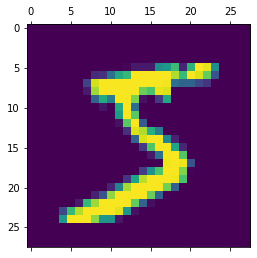

In [8]:
plt.matshow(x_train[0])

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [14]:
history=model.fit(x_train,
y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6433 - accuracy: 0.8363 - val_loss: 0.3594 - val_accuracy: 0.9006
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3392 - accuracy: 0.9050 - val_loss: 0.2948 - val_accuracy: 0.9171
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2918 - accuracy: 0.9177 - val_loss: 0.2657 - val_accuracy: 0.9265
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2620 - accuracy: 0.9270 - val_loss: 0.2435 - val_accuracy: 0.9332
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2397 - accuracy: 0.9327 - val_loss: 0.2247 - val_accuracy: 0.9360
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2214 - accuracy: 0.9374 - val_loss: 0.2113 - val_accuracy: 0.9412
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2058 - accuracy: 0.9426 - val_loss: 0.1986 - val_accuracy:

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 900us/step - loss: 0.1688 - accuracy: 0.9535
Loss=0.169
Accuracy=0.953


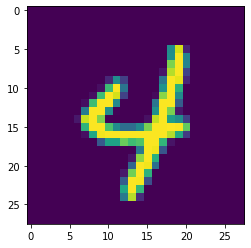

In [19]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

313/313 [==============================] - 0s 917us/step


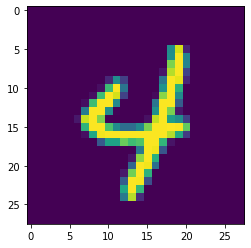

[5.9137669e-06 1.6178181e-08 2.2476557e-05 1.3717209e-06 9.9887675e-01
 2.1859552e-05 1.1711097e-04 1.4207546e-04 2.2447382e-05 7.9003972e-04]


In [27]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print(predicted_value[n])

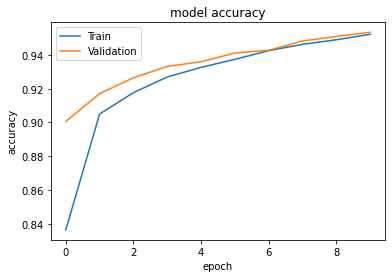

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

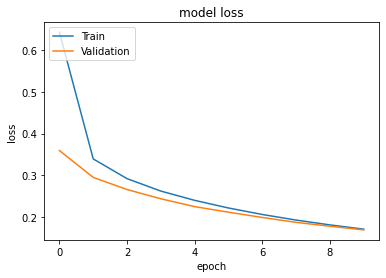

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [31]:
test_predict = model.predict(x_test)
test_predict_labels=np.argmax(test_predict, axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=test_predict_labels)
print('confusion matrix of the test set: \n', confusion_matrix)

313/313 [==============================] - 0s 858us/step
confusion matrix of the test set: 
 tf.Tensor(
[[ 967    0    1    2    0    4    4    1    1    0]
 [   0 1113    3    2    1    1    4    2    9    0]
 [   8    1  983   11    5    2    5    6   10    1]
 [   1    1    8  969    0   14    0    9    7    1]
 [   1    1    4    1  932    0   10    2    5   26]
 [   8    1    0   21    5  830   12    3    8    4]
 [  10    3    3    1    7    9  923    1    1    0]
 [   1    6   21   10    3    2    0  970    2   13]
 [   3    3    6   16    6    9   11   10  908    2]
 [  10    6    1   13   21    4    1   10    3  940]], shape=(10, 10), dtype=int32)


Text(0.5, 69.0, 'predicted')

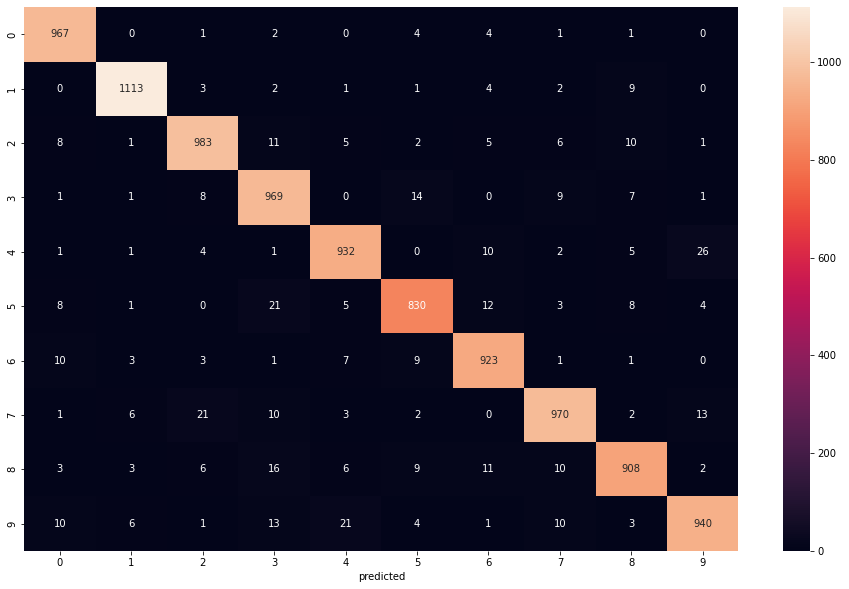

In [35]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('predicted')